## Data Preparation (LDM)

This notebook prepares the audio samples generated from LDM for training by applying a series of cleaning, filtering, and transformation steps.

Note:
- The code below has been configured to run on Google colab with python scripts imported from Google Drive. All helper files can be found under data_preparation folder.
- All output in this notebook are provided for your reference. This is to help you know how it should look like after running the various functions.

Pipeline Summary:

0. Mount Google Drive
1. Process Audio Files
2. Label Alignment
3. Data Integrity Check

### 0. Mount Google Drive

- This step handles mounting Drive and ensuring access scripts and datasets stored in your Drive.
- Accompanying helper file: step1_get_zip.py

In [1]:
# Mount Google Drive to access files
# This code is intended to be run in Google Colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
# To run this notebook, you need to cd to the folder where the helper files are located.
# You can do this by running the following command:
%cd /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/py_util/

/content/drive/.shortcut-targets-by-id/1UBr7xHwiaUCT4Y9U0LH_0qJJfCYxNbgT/AML/Dataprep/test_ldm_dataprep_for_github/py_util


In [3]:
# As backup, to use the helper files, we add its path to the system path
# This is not necessary if you are already in the correct directory.
# You can comment this line out if you are already in the correct directory.
import sys
sys.path.append('/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/py_util')

In [4]:
# Importing the function to check if the drive is mounted, and to mount it if not
from step1_get_zip import mount_drive
mount_drive()

Google Drive already mounted.


Expected Output:
- Google Drive mounted
- Able to access helper files

### 1. Process Audio Files

This step enhances the quality and consistency of audio samples to make them suitable for machine learning models. It applies a full preprocessing pipeline to raw .wav files.

Note that LDM-generated audio files were already split into healthy and unhealthy, hence it would be repeated on both set of samples.

- Purpose:
    - To standardize and clean audio files for robust training/testing of models.
    - Remove noise and variability due to different recording conditions.
- Key processing steps:
    - Signal-to-Noise Ratio (SNR) Filtering: Filters out poor-quality recordings with low SNR to retain only clear cough sounds.
    - Resampling: Resamples all audio to a standard sample rate (e.g., 16 kHz) for model compatibility.
    - Denoising: Applies noise reduction techniques (e.g., spectral gating, Non-Local Means) to reduce background noise.
    - Silence Trimming: Automatically removes silent segments at the beginning and end of the recording to isolate the cough signal.
- Batch Processing: Processes all files in a given folder (e.g., *_converted) and saves outputs into a new directory (e.g., *_processed).
- Accompanying helper file: step4_process_audio.py
    - Contains the pipeline logic via process_and_save_dataset() function.

In [5]:
# Install noisereduce for noise reduction procesesing component
!pip install noisereduce

Starting with the 'healthy' LDM-generated samples first

In [6]:
# Importing the function to process and save the dataset
from step4_process_audio import process_and_save_dataset

# Define paths for the input and output folders
# Input folder containing the LDM-generated audio files that are 'healthy'
# Output folder where the processed audio files will be saved
# This folder will be created if it doesn't exist
# Make sure to change the paths according to your directory structure
input_folder = "/content/drive/MyDrive/AML_LDM/AML/generated_healthy_audioldm"
output_folder = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm"

# Run the processing pipeline
# This will process the audio files in the input folder and save them to the output folder
process_and_save_dataset(input_folder, output_folder)

Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm/generated_healthy_10.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm/generated_healthy_11.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm/generated_healthy_12.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm/generated_healthy_13.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm/generated_healthy_14.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm/generated_healthy_15.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm/generated_healthy_16.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fort

Followed by the 'unhealthy' LDM-generated samples next

In [7]:
# Importing the function to process and save the dataset
from step4_process_audio import process_and_save_dataset

# Define paths for the input and output folders
# Input folder containing the LDM-generated audio files that are 'unhealthy'
# Output folder where the processed audio files will be saved
# This folder will be created if it doesn't exist
# Make sure to change the paths according to your directory structure
input_folder = "/content/drive/MyDrive/AML_LDM/AML/generated_unhealthy_audioldm"
output_folder = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm"

# Run the processing pipeline
# This will process the audio files in the input folder and save them to the output folder
process_and_save_dataset(input_folder, output_folder)

Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm/generated_unhealthy_34.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm/generated_unhealthy_38.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm/generated_unhealthy_39.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm/generated_unhealthy_46.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm/generated_unhealthy_49.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm/generated_unhealthy_50.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm/generated_unhealthy_57.wav
Saved: /content/drive/MyDrive/AML/Dataprep/test_

Expected Output:
- A new folder each for 'healthy' and 'unhealthy' containing:
    - .wav files that have been cleaned and standardized
    - One file per input sample (matching the same UUIDs or filenames)
- All files should now:
    - Have a consistent duration and sample rate
    - Be denoised and trimmed
    - -Be smaller in size and better in quality than the originals
- The total number of output files will match or be fewer than the input files (some may be dropped during filtering).

### 2. Label Alignment

- This step prepares the labels that align with the cleaned audio.
- Purpose:
    - Ensure that each processed audio file has a corresponding binary label.
- Key steps:
    - Label Alignment:
        - Matches each .wav file in the processed audio folder to its corresponding label from the cleaned metadata CSV.
        - Only audio files that have both a label and a valid processed .wav file are retained.
    - Accompanying helper file: step5_split_and_label.py

Starting with 'healthy' first

In [8]:
from step5_split_and_label import generate_labels_csv

# Paths
processed_healthy_dir = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm"
original_labels_csv = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/generated_audioldm_metadata.csv"
processed_healthy_csv = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/processed_healthy_audioldm_metadata.csv"

# Update healthy label CSV
generate_labels_csv(
    processed_audio_dir=processed_healthy_dir,
    original_labels_csv=original_labels_csv,
    output_labels_csv=processed_healthy_csv,
    id_column=None
)

Found 185 processed audio files
Detected ID column: 'uuid'

Summary of Label Distribution:
- Matched Files: 185
- Healthy: 0
- Not Healthy: 185
- New labels CSV saved to: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/processed_healthy_audioldm_metadata.csv


,uuid,health_status
2,generated_healthy_360,0
3,generated_healthy_114,0
5,generated_healthy_19,0
6,generated_healthy_92,0
9,generated_healthy_187,0
...,...,...
327,generated_healthy_51,0
328,generated_healthy_81,0
329,generated_healthy_18,0
338,generated_healthy_56,0


Then 'unhealthy' next

In [9]:
processed_healthy_dir = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm"
original_labels_csv = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/generated_audioldm_metadata.csv"
processed_unhealthy_csv = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/processed_unhealthy_audioldm_metadata.csv"

# Update healthy label CSV
generate_labels_csv(
    processed_audio_dir=processed_healthy_dir,
    original_labels_csv=original_labels_csv,
    output_labels_csv=processed_unhealthy_csv,
    id_column=None
)

Found 157 processed audio files
Detected ID column: 'uuid'

Summary of Label Distribution:
- Matched Files: 157
- Healthy: 157
- Not Healthy: 0
- New labels CSV saved to: /content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/processed_unhealthy_audioldm_metadata.csv


,uuid,health_status
0,generated_unhealthy_447,1
1,generated_unhealthy_456,1
4,generated_unhealthy_229,1
7,generated_unhealthy_477,1
8,generated_unhealthy_469,1
...,...,...
335,generated_unhealthy_93,1
336,generated_unhealthy_436,1
337,generated_unhealthy_434,1
339,generated_unhealthy_497,1


Expected Output:
- Two CSVs:
    - processed_healthy_audioldm_metadata.csv – labels for processed 'healthy' files (or according to your csv name)
    - processed_unhealthy_audioldm_metadata.csv – labels for processed 'unhealthy' files (or according to your csv name)
- All files are guaranteed to have valid audio and a corresponding label.

### 2. Data Integrity Check

- This final step ensures that your dataset is clean, consistent, and ready for modeling. It acts as a validation gate to catch any mismatches or missing files before training begins.
- Purpose:
    - Validate that the .wav files match the filenames listed in their respective label CSVs.
    - Check for missing or extra files.
    - Confirm that label values are within the expected range (e.g., only 0 or 1).
    - Verify balanced distribution of labels.
- Key checks performed:
    - File existence: Confirms every filename listed in the CSV actually exists in the folder.
    - CSV validity: Ensures the health_status column is present and contains valid values (0 or 1).
    - Label distribution: Outputs a quick summary of class distribution (e.g., 50% healthy, 50% not healthy). Helps catch class imbalance early.
    - Sample listing: Displays a few filenames and their labels to visually inspect correctness.
- Accompanying helper file: step6_check_dataset.py

Starting with 'healthy' first

Total Healthy Files: 185
Sample Healthy Files: ['generated_healthy_10.wav', 'generated_healthy_11.wav', 'generated_healthy_12.wav', 'generated_healthy_13.wav', 'generated_healthy_14.wav', 'generated_healthy_15.wav', 'generated_healthy_16.wav', 'generated_healthy_18.wav', 'generated_healthy_19.wav', 'generated_healthy_22.wav']
Detected ID column: 'uuid'
Unique health_status labels in Healthy set: [0]
Sample Healthy labels: [('generated_healthy_360.wav', 0), ('generated_healthy_114.wav', 0), ('generated_healthy_19.wav', 0), ('generated_healthy_92.wav', 0), ('generated_healthy_187.wav', 0)]
185 Healthy files labeled correctly.
Healthy labels match the number of healthy files.


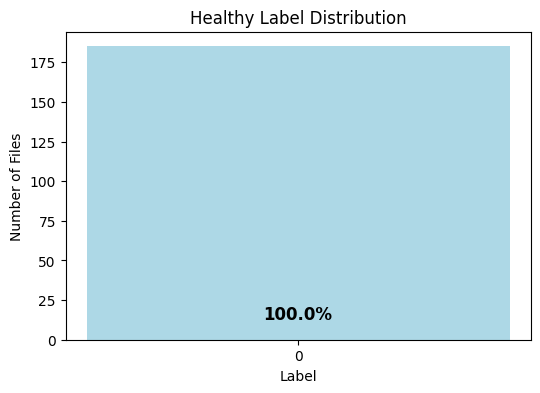

Skipped 0 files due to errors.

Healthy Group: 185 samples

Sample audio shapes:
generated_healthy_360.wav: (41984,)
generated_healthy_114.wav: (6144,)
generated_healthy_19.wav: (57952,)
generated_healthy_92.wav: (27136,)
generated_healthy_187.wav: (7168,)


In [10]:
# Import functions from step6_check_dataset.py
from step6_check_dataset import list_files, load_labels, load_audio_dataset, plot_distribution

# Paths
healthy_dir = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_healthy_audioldm"
healthy_csv = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/processed_healthy_audioldm_metadata.csv"

# List files
total_files = list_files(healthy_dir, label="Healthy")

# Load labels
label_dict, label_counts = load_labels(healthy_csv, dataset_name="Healthy")

# Check if label count matches file count
if len(label_dict) == total_files:
    print("Healthy labels match the number of healthy files.")
else:
    print(f"Mismatch: {len(label_dict)} labels vs. {total_files} audio files.")

# Plot distribution
plot_distribution(list(label_counts.values()), list(map(str, label_counts.keys())), "Healthy Label Distribution")

# Load audio and inspect
X, y, files = load_audio_dataset(healthy_dir, label_dict)
print(f"\nHealthy Group: {X.shape[0]} samples")

# Inspect shape of some files
print("\nSample audio shapes:")
for audio, name in zip(X[:5], files[:5]):
    print(f"{name}: {audio.shape}")

Then 'unhealthy' next

Total Unhealthy Files: 157
Sample Unhealthy Files: ['generated_unhealthy_34.wav', 'generated_unhealthy_38.wav', 'generated_unhealthy_39.wav', 'generated_unhealthy_46.wav', 'generated_unhealthy_49.wav', 'generated_unhealthy_50.wav', 'generated_unhealthy_57.wav', 'generated_unhealthy_58.wav', 'generated_unhealthy_63.wav', 'generated_unhealthy_72.wav']
Detected ID column: 'uuid'
Unique health_status labels in Unhealthy set: [1]
Sample Unhealthy labels: [('generated_unhealthy_447.wav', 1), ('generated_unhealthy_456.wav', 1), ('generated_unhealthy_229.wav', 1), ('generated_unhealthy_477.wav', 1), ('generated_unhealthy_469.wav', 1)]
157 Unhealthy files labeled correctly.
Unhealthy labels match the number of unhealthy files.


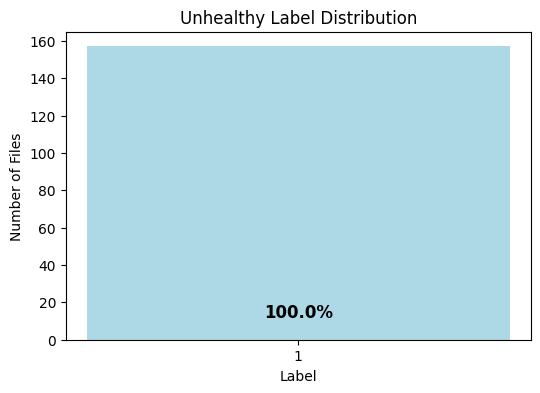

Skipped 0 files due to errors.

Unhealthy Group: 157 samples

Sample audio shapes:
generated_unhealthy_447.wav: (43008,)
generated_unhealthy_456.wav: (51712,)
generated_unhealthy_229.wav: (60000,)
generated_unhealthy_477.wav: (39424,)
generated_unhealthy_469.wav: (44544,)


In [11]:
# Paths
unhealthy_dir = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/fortest_processed_unhealthy_audioldm"
unhealthy_csv = "/content/drive/MyDrive/AML/Dataprep/test_ldm_dataprep_for_github/processed_unhealthy_audioldm_metadata.csv"

# List files
total_files = list_files(unhealthy_dir, label="Unhealthy")

# Load labels
label_dict, label_counts = load_labels(unhealthy_csv, dataset_name="Unhealthy")

# Check if label count matches file count
if len(label_dict) == total_files:
    print("Unhealthy labels match the number of unhealthy files.")
else:
    print(f"Mismatch: {len(label_dict)} labels vs. {total_files} audio files.")

# Plot distribution
plot_distribution(list(label_counts.values()), list(map(str, label_counts.keys())), "Unhealthy Label Distribution")

# Load audio and inspect
X, y, files = load_audio_dataset(unhealthy_dir, label_dict)
print(f"\nUnhealthy Group: {X.shape[0]} samples")

# Inspect shape of some files
print("\nSample audio shapes:")
for audio, name in zip(X[:5], files[:5]):
    print(f"{name}: {audio.shape}")